In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

from scipy.stats import shapiro,  poisson, chisquare, expon, kstest
from scipy import stats
from scipy.stats import norm
#import statsmodels.api as sm

# Gestión de los warnings
# -------------------------------
import warnings
warnings.filterwarnings("ignore")


###                 Fase 1: Exploracion y limpieza

##### 1. Exploración inicial.

In [2]:
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

df= pd.read_csv('Customer_Flight_Activity.csv',header=0)
dfhist = pd.read_csv('Customer_Loyalty_History.csv',header=0)

In [3]:
def exploracion_dataframe(dataframe):
    """
    Función que explora un dataframe.
    
    Parametros:
        dataframe (DataFrame): dataframe para explorar

    Returns:
        Esta función visualiza con prints con información 
        de los datos del dataframe
    """
    print(f"El dataframe contiene {df.shape[0]} filas y {df.shape[1]} columnas")
    print(f"De todo el conjunto de datos tenemos  {dataframe.duplicated().sum()} duplicados.")
    print("\n ..................... \n")
    display(dataframe.sample(5))
    display(dataframe.info())
    
    # generamos un DataFrame para los valores nulos
    print("De todo el conjunto de datos tenemos los siguientes nulos:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    
    print("\n ..................... \n")
    print(f"Las columnas son de tipo:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))
    

    print("\n ..................... \n")
    
    dataframe_categoricas = dataframe.select_dtypes(include = "O")

    print("Los valores que tenemos para las columnas categóricas son: ")
    
    for col in dataframe_categoricas.columns:
        print(f"La columna {col.upper()} tiene las siguientes valore únicos:")
        display(pd.DataFrame(dataframe[col].value_counts()))   
    

Exploramos el primer dataframe.

In [4]:
exploracion_dataframe(df)

El dataframe contiene 405624 filas y 10 columnas
De todo el conjunto de datos tenemos  1864 duplicados.

 ..................... 



,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
287731,122283,2018,6,6,4,10,4560,456.0,0,0
238313,192096,2018,3,0,0,0,0,0.0,0,0
154589,233958,2017,10,6,0,6,2334,233.0,0,0
2907,256486,2017,1,0,0,0,0,0.0,0,0
344969,471170,2018,9,0,0,0,0,0.0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


None

De todo el conjunto de datos tenemos los siguientes nulos:


,%_nulos



 ..................... 

Las columnas son de tipo:


,tipo_dato
Loyalty Number,int64
Year,int64
Month,int64
Flights Booked,int64
Flights with Companions,int64
Total Flights,int64
Distance,int64
Points Accumulated,float64
Points Redeemed,int64
Dollar Cost Points Redeemed,int64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 


Realizamos la exploracion del segundo dataframe.

In [5]:
exploracion_dataframe(dfhist)

El dataframe contiene 405624 filas y 10 columnas
De todo el conjunto de datos tenemos  0 duplicados.

 ..................... 



,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
271,223684,Canada,Ontario,Toronto,P1J 8T7,Male,Bachelor,74964.0,Married,Star,4362.93,Standard,2018,7,NaN,NaN
14127,521699,Canada,Ontario,Toronto,M2M 6J7,Female,Doctor,220552.0,Single,Star,6183.11,Standard,2016,12,2017.0,8.0
10865,877124,Canada,Quebec,Montreal,H2T 2J6,Male,Bachelor,62181.0,Married,Star,2519.57,Standard,2016,9,NaN,NaN
3295,302839,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,96460.0,Divorced,Aurora,11895.18,Standard,2014,9,NaN,NaN
3494,953198,Canada,Ontario,Ottawa,K1F 2R2,Male,Bachelor,75231.0,Single,Aurora,13770.98,Standard,2016,3,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

None

De todo el conjunto de datos tenemos los siguientes nulos:


,%_nulos
Salary,25.321145
Cancellation Year,87.650117
Cancellation Month,87.650117



 ..................... 

Las columnas son de tipo:


,tipo_dato
Loyalty Number,int64
Country,object
Province,object
City,object
Postal Code,object
Gender,object
Education,object
Salary,float64
Marital Status,object
Loyalty Card,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna COUNTRY tiene las siguientes valore únicos:


,Country
Canada,16737


La columna PROVINCE tiene las siguientes valore únicos:


,Province
Ontario,5404
British Columbia,4409
Quebec,3300
Alberta,969
Manitoba,658
New Brunswick,636
Nova Scotia,518
Saskatchewan,409
Newfoundland,258
Yukon,110


La columna CITY tiene las siguientes valore únicos:


,City
Toronto,3351
Vancouver,2582
Montreal,2059
Winnipeg,658
Whistler,582
Halifax,518
Ottawa,509
Trenton,486
Edmonton,486
Quebec City,485


La columna POSTAL CODE tiene las siguientes valore únicos:


,Postal Code
V6E 3D9,911
V5R 1W3,684
V6T 1Y8,582
V6E 3Z3,544
M2M 7K8,534
P1J 8T7,500
H2T 9K8,499
K8V 4B2,486
G1B 3L5,485
H2T 2J6,446


La columna GENDER tiene las siguientes valore únicos:


,Gender
Female,8410
Male,8327


La columna EDUCATION tiene las siguientes valore únicos:


,Education
Bachelor,10475
College,4238
High School or Below,782
Doctor,734
Master,508


La columna MARITAL STATUS tiene las siguientes valore únicos:


,Marital Status
Married,9735
Single,4484
Divorced,2518


La columna LOYALTY CARD tiene las siguientes valore únicos:


,Loyalty Card
Star,7637
Nova,5671
Aurora,3429


La columna ENROLLMENT TYPE tiene las siguientes valore únicos:


,Enrollment Type
Standard,15766
2018 Promotion,971


Vamos a unir ambos dataframe por la columna que tienen en común, la columna Loyalty Number. Para ello vamos a usar un inner

In [6]:
df_unido = pd.merge(df, dfhist, on='Loyalty Number', how='inner')
df_unido.head(3)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


Nos ha quedado un dataframe unido que inicialmente tiene la siguiente informacion:

In [7]:
df_unido.shape

(405624, 25)

In [19]:
df_unido.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month'],
      dtype='object')

##### 2. Limpieza de datos.

Empecemos por eliminar los duplicados.Recordemos cuantos tenemos primero.

In [8]:
df_unido.duplicated().sum()

1864

Eliminamos y comprobamos de nuevo el tamaño.

In [9]:
df_unido.drop_duplicates(inplace=True)
df_unido.duplicated().sum()

0

Antes de empezar a tratar los nulos vamos a hacer algunas limpiezas en nuestro dataframe.

In [10]:
def limpiar_columnas(dataframe):
    """
    Limpia las columnas, las convierte en minusculas y le quita los espacios 
    entre palabras poniendoles un'_'
    
    Parametros:
    Dataframe a modificar
    
    Returns:
    Dataframe modificado.
    """
    # Convierte los nombres de las columnas a minúsculas
    dataframe.columns = [col.lower() for col in dataframe.columns]
    
   
    dataframe.columns = [col.replace(' ', '_') for col in dataframe.columns]
    #Si hay valors negativos en una columna numerica lo convertimos a nulo directamente.
    
    for col in dataframe.select_dtypes(include='number').columns:
        dataframe[col] = dataframe[col].apply(lambda x: None if x < 0 else x)
    
    
    return dataframe

In [11]:
df_unido = limpiar_columnas(df_unido)

Vamos a empezar con los nulos. Como ya sabemos que no tiene columnas categóricas pues directamente buscamos en las numéricas.

In [12]:
#Columnas numéricas con nulos 

nulos_num = df_unido[df_unido.columns[df_unido.isnull().any()]].select_dtypes(include = np.number).columns
print(nulos_num)

Index(['salary', 'cancellation_year', 'cancellation_month'], dtype='object')


In [13]:
# lo convertimos a DataFrame
df_nulos = pd.DataFrame((df_unido.isnull().sum() / df.shape[0]) * 100, columns = ["%_nulos"])
# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos = df_nulos[df_nulos["%_nulos"] > 0]
df_nulos




,%_nulos
salary,25.328876
cancellation_year,87.300061
cancellation_month,87.300061


Vamos a visualizarlas primero.

Voy a empezar por las columnas de cancelaciones.Estas columnas indican si los clientes han dejado de serlo, por lo tanto los nulos los entiendo como que son clientes activos.Voy a convertir las columnas a categoricas y les voy a aplicar el valor "Activo".

In [15]:
# # iteramos por la lista de columnas a las que le vamos a cambiar los nulos por Activo
columnas = ['cancellation_year','cancellation_month']

for col in columnas:
    df_unido[col] = df_unido[col].fillna("Activo")
    df_unido[col] = df_unido[col].astype(str)
    
    # comprobamos si quedan nulos en las columnas categóricas. 
    print(f"Después del fillna' quedan los siguientes nulos {df_unido[col].isnull().sum()}")
    

Después del fillna' quedan los siguientes nulos 0
Después del fillna' quedan los siguientes nulos 0


In [16]:
df_unido['cancellation_year'].unique()

array(['Activo', '2018.0', '2015.0', '2016.0', '2014.0', '2013.0',
       '2017.0'], dtype=object)

In [17]:
df_unido['cancellation_month'].unique()

array(['Activo', '3.0', '9.0', '2.0', '7.0', '6.0', '8.0', '4.0', '1.0',
       '5.0', '11.0', '12.0', '10.0'], dtype=object)

Para la tabla salary, vamos a aplicarle los métodos Iterative Imputer y el KNN.
Empezamos por el Iterative Imputer.También lo compararemos con su media y con la mediana.

Empecemos mirando su media y su mediana

In [22]:
# Mostrar estadísticas descriptivas para 'salary'
print(df_unido['salary'].describe())


count    301020.000000
mean      79441.628829
std       34704.340158
min       15609.000000
25%       59278.000000
50%       73523.000000
75%       88626.000000
max      407228.000000
Name: salary, dtype: float64


Vayamos ahora con el Iterative Imputer

In [23]:
df_unido_copy = df_unido.copy()

In [25]:

# Crear una copia del DataFrame
df_iterative_salary = df_unido.copy()

# Seleccionar solo la columna 'salary'
columna_salary = ['salary']

# Inicializar el imputador iterativo
iterative_imputer_salary = IterativeImputer(max_iter=10, random_state=0)

# Imputar los valores nulos en la columna 'salary'
df_iterative_salary[columna_salary] = iterative_imputer_salary.fit_transform(df_iterative_salary[columna_salary])
df_unido['salary_it'] = df_iterative_salary[columna_salary]

In [29]:
df_unido['salary_it'].sample(5)

268681    52927.0
141900    45229.0
403351    74651.0
328388    59264.0
87439     85316.0
Name: salary_it, dtype: float64

In [30]:
df_unido['salary_it'].isnull().sum()

0

Probemos con el KNN IMPUTER, aunque lleva bastante tiempo el cálculo.

In [31]:


# Crear una copia del DataFrame
df_knn_salary = df_unido.copy()

# Seleccionar solo la columna 'salary'
columna_salary = ['salary']

# Inicializar el imputador KNN
knn_imputer_salary = KNNImputer(n_neighbors=5)

# Imputar los valores nulos en la columna 'salary'
df_knn_salary[columna_salary] = knn_imputer_salary.fit_transform(df_knn_salary[columna_salary])
df_unido['salary_knn'] = df_knn_salary[columna_salary]

In [32]:
df_unido['salary_knn'].sample(5)

219134    52712.000000
265684    91239.000000
267661    79441.628829
86498     56904.000000
267400    79441.628829
Name: salary_knn, dtype: float64

In [33]:
df_unido['salary_knn'].isnull().sum()

0

In [35]:
df_unido.describe()[["salary", "salary_it","salary_knn"]]

,salary,salary_it,salary_knn
count,301020.000000,403760.000000,403760.000000
mean,79441.628829,79441.628829,79441.628829
std,34704.340158,29965.369530,29965.369530
min,15609.000000,15609.000000,15609.000000
25%,59278.000000,64001.000000,64001.000000
50%,73523.000000,79441.628829,79441.628829
75%,88626.000000,82940.000000,82940.000000
max,407228.000000,407228.000000,407228.000000


Como veo que hay mucha diferencia entre la mediana y los estadisticos que hemos calculado, voy a decidirme por la mediana que a mi parecer no tiene tanta diferencia.

In [36]:

# Calcular la mediana de la columna 'salary'
mediana_salary = df_unido['salary'].median()

# Imputar los valores nulos en la columna 'salary' con la mediana
df_unido['salary'].fillna(mediana_salary, inplace=True)


In [37]:
df_unido.isnull().sum()

loyalty_number                 0
year                           0
month                          0
flights_booked                 0
flights_with_companions        0
total_flights                  0
distance                       0
points_accumulated             0
points_redeemed                0
dollar_cost_points_redeemed    0
country                        0
province                       0
city                           0
postal_code                    0
gender                         0
education                      0
salary                         0
marital_status                 0
loyalty_card                   0
clv                            0
enrollment_type                0
enrollment_year                0
enrollment_month               0
cancellation_year              0
cancellation_month             0
salary_it                      0
salary_knn                     0
dtype: int64

Vale, ahora ya solamente me queda borrar las dos columnas que acabamos de crear con el imputer y el knn.

In [39]:
# Eliminar columnas adicionales creadas para imputación iterativa y knn
df_unido.drop(['salary_it', 'salary_knn'], axis=1, inplace=True)


In [40]:
df_unido.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month'],
      dtype='object')

###                 Fase 2: Visualización

#### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

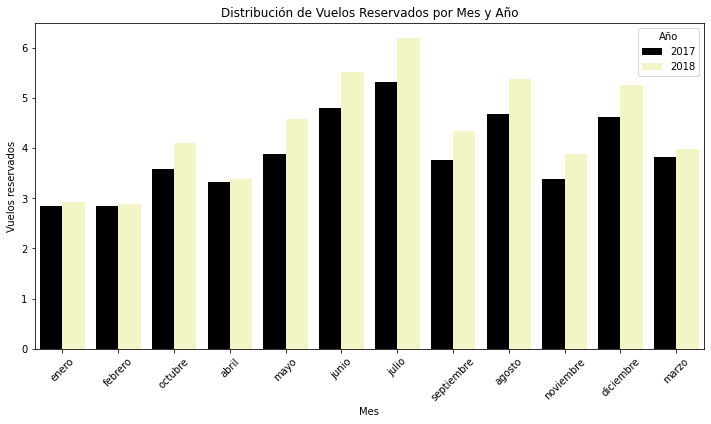

In [68]:
meses = {1: 'enero', 2: 'febrero', 3: 'marzo', 4: 'abril', 5: 'mayo', 6: 'junio',
                 7: 'julio', 8: 'agosto', 9: 'septiembre', 10: 'octubre', 11: 'noviembre', 12: 'diciembre'}

df_unido['nombre_mes'] = df_unido['month'].map(meses)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_unido, x='nombre_mes', y='flights_booked', ci=None, hue='year', palette='magma')
plt.xlabel('Mes')
plt.ylabel('Vuelos reservados')
plt.title('Distribución de Vuelos Reservados por Mes y Año')
plt.legend(title='Año')
plt.xticks(rotation=45)  
plt.show(); 


Las reservas de vuelos fueron mayores en 2018 que en 2017.
Además apreciamos que en ambos años hay crecimiento en el número de reservas
y picos corresponden con vacaciones escolares: Semana Santa, Verano y Navidad.
Los meses que por el contrario se hacen  menos reservas son enero y febrero seguidos de abril.

#### 2.¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

In [42]:
df_unido.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month', 'nombre_mes'],
      dtype='object')

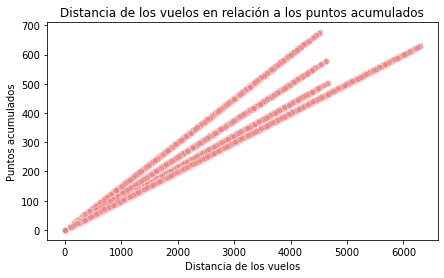

In [43]:
# Crear un scatterplot
plt.figure(figsize=(7, 4))
sns.scatterplot(x="distance", y="points_accumulated", data=df_unido, color="lightcoral", alpha=0.5)
plt.title("Distancia de los vuelos en relación a los puntos acumulados")
plt.xlabel("Distancia de los vuelos")
plt.ylabel("Puntos acumulados")
plt.show()

Existe una clara tendencia positiva entre ambas variables, según sube una sube la otra, es decir, se obtienen mas puntos cuanta mas distancia se recorra.

#### 3. Cuál es la distribución de los clientes por provincia o estado?


Comprobamos y vemos que solo tenemos datos de Canada, por lo que no tendremos que movernos enytre paises, solo por provincias.

In [44]:
df_unido['country'].unique()

array(['Canada'], dtype=object)

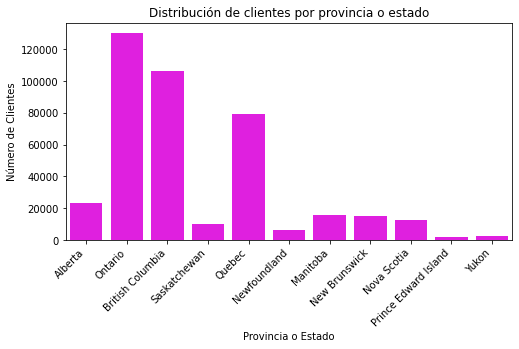

In [45]:
#Crear un countplot
plt.figure(figsize=(8, 4))
sns.countplot(x="province",data=df_unido, color="magenta")
plt.title("Distribución de clientes por provincia o estado")
plt.xlabel("Provincia o Estado")
plt.ylabel("Número de Clientes")
plt.xticks(rotation=45, ha="right")  
plt.show()


Los datos nos muestran que la mayor parte de los clientes son de Ontario, British Columbia y Quebec.
Por otro lado, las provincias con menor cantidad de clientes son Yukon y Prince Edward Island

#### 4.Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [ ]:
df_unido["education"].value_counts()

In [ ]:
#rdenamos los niveles educativos
educacion_ordenada = ["High School or Below", "College", "Bachelor", "Master", "Doctor"]
educacion_ordenada

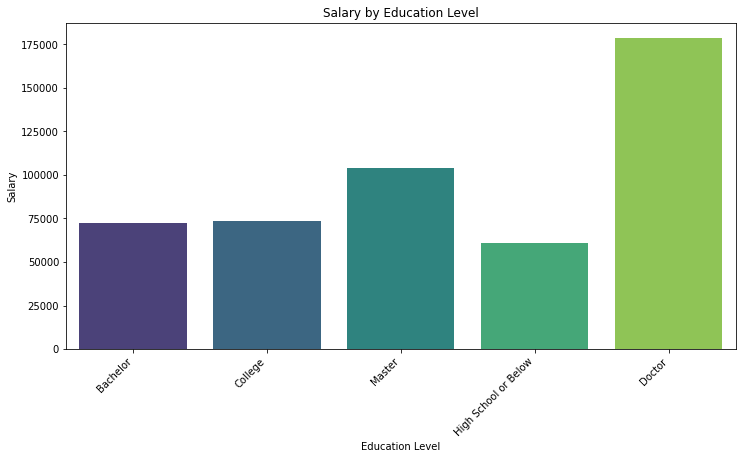

In [48]:

# Eliminar filas con valores nulos en 'education' o 'salary'
df_unido_clean = df_unido.dropna(subset=['education', 'salary'])

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='education', y='salary', data=df_unido_clean, palette='viridis', ci=None)

# Añadir etiquetas y título
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.title('Salary by Education Level')

# Rotar etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()



Vemos que los clientes con doctorados son claramente los clientes con mayor salario.
Los clientes con menor nivel de estudios son los que menos cobran, seguidos de cerca por aquellos que han realizado una licenciatura.

Aquellos con un master tienen un sueldo notoriamente superior a los licenciados.
Podemos concluir que en general a mayor cantidad de estudios mayor es el salario, salvo en el caso de las diplomaturas y licenciaturas, que resulta al revés

#### 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?.

In [49]:
df_tarjetas = df_unido.groupby("loyalty_card")["loyalty_number"].count().reset_index()
df_tarjetas

,loyalty_card,loyalty_number
0,Aurora,83132
1,Nova,136883
2,Star,183745


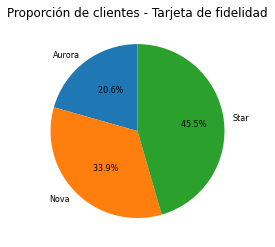

In [54]:
plt.pie("loyalty_number", labels= "loyalty_card",
        data = df_tarjetas, 
        autopct=  '%8.1f%%', 
        textprops={'fontsize': 8}, 
        startangle=90)
plt.title("Proporción de clientes - Tarjeta de fidelidad")
plt.show()


Podemos observar que la mayoría, el 45,6%, de los clientes tienen la tarjeta de fidelidad Star.
En cambio la tarjeta Aurora que tiene menor cantidad de gente es la Aurora.

#### 6. Cómo se distribuyen los clientes según su estado civil y género?

In [ ]:
df_unido.columns

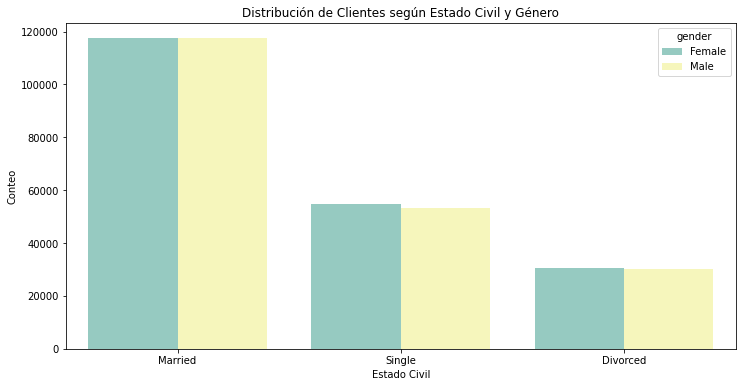

In [59]:


df_marital = df_unido[['marital_status', 'gender']]
plt.figure(figsize=(12, 6))
sns.countplot(x='marital_status', hue='gender', data=df_marital, palette='Set3')

# Mostrar el plot
plt.title('Distribución de Clientes según Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Conteo')
plt.show()


Los datos nos muestran que:
El gran grueso de cliente se encuentra casado.
Los que menos viajan están divorciados.
No parece haber una diferencia de comportamiento en cuanto a género, ya que las distribuciones por estado civil son bastantes pares, así como el conteo de viajes.

### Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:

#### 1. Preparación de Datos:

Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [60]:
df_filtrado = df_unido[['flights_booked','education']]
df_filtrado.head()

,flights_booked,education
0,3,Bachelor
1,2,Bachelor
2,6,Bachelor
3,4,Bachelor
4,0,Bachelor


#### 2.Análisis Descriptivo:

Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

In [61]:
nivel_educativo = df_filtrado.groupby('education')['flights_booked'].describe()

nivel_educativo

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


#### 3.Prueba Estadística

Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

Para resolverlo, vamos a tomar la Hipotesis 0 H[0] y la Hipótesis 1 H[1].

H[0],será la negacion de lo que queremos demostrar, es decir, que no existe diferencia
significativa en el numero de vuelos reservados entre los clientes conniveles educativos considerados altos (Doctor,Master,Bachelor) y aquellos con niveles educativos considerados bajos(college,High Scholl or below).

La hipotesis H[1] será por el contrariio la demostración de que si existe diferencia.

In [62]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 405623
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   flights_booked  403760 non-null  int64 
 1   education       403760 non-null  object
dtypes: int64(1), object(1)
memory usage: 25.4+ MB


Ahora voy a hacerle un test de normalidad (Test de Shapiro) Si no tiene normalidad directamente le haré el test de Mann-Whitney.

In [65]:
from scipy.stats import shapiro

# Filtrar datos por niveles educativos considerados altos y bajos
altos_educativos = ['Doctor', 'Master', 'Bachelor']
bajos_educativos = ['College', 'High School or Below']

# Obtener muestras para cada grupo
muestra_altos = df_unido[df_unido['education'].isin(altos_educativos)]['flights_booked']
muestra_bajos = df_unido[df_unido['education'].isin(bajos_educativos)]['flights_booked']

# Realizar el test de Shapiro-Wilk para cada grupo
stat_altos, p_value_altos = shapiro(muestra_altos)
stat_bajos, p_value_bajos = shapiro(muestra_bajos)

# Mostrar los resultados
print(f'Test de Shapiro-Wilk para educativos considerados altos: Estadística={stat_altos}, p-valor={p_value_altos}')
print(f'Test de Shapiro-Wilk para educativos considerados bajos: Estadística={stat_bajos}, p-valor={p_value_bajos}')


Test de Shapiro-Wilk para educativos considerados altos: Estadística=0.7872470021247864, p-valor=0.0
Test de Shapiro-Wilk para educativos considerados bajos: Estadística=0.7911023497581482, p-valor=0.0


Los resultados del test de Shapiro-Wilk para ambos grupos (educativos considerados altos y bajos) indican que los datos no siguen una distribución normal (p-valor < 0.05). Esto significa que no podemos asumir normalidad en los datos.Hagamosle entonces el siguiente test de mann whitneyu

In [66]:


# Dividir el conjunto de datos en dos grupos
grupo_control = df_unido[df_unido['education'].isin(['Bachelor', 'Master', 'Doctor'])]['flights_booked']
grupo_tratamiento = df_unido[df_unido['education'].isin(['College', 'High School or Below'])]['flights_booked']

# Realizar la prueba de Mann-Whitney U
estadistico_U, p_valor = stats.mannwhitneyu(grupo_control, grupo_tratamiento, alternative='two-sided')

# Definir el nivel de significancia
nivel_significancia = 0.05

# Comprobar el p-valor y tomar una decisión
if p_valor < nivel_significancia:
    print(f"Se rechaza la hipótesis nula. Existe una diferencia significativa en el número de vuelos reservados entre los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay suficiente evidencia para afirmar que hay una diferencia significativa.")


Se rechaza la hipótesis nula. Existe una diferencia significativa en el número de vuelos reservados entre los grupos.


Como conclusión al ejercicio podemos ver que si existe una diferencia en cuanto a reservas, cuanto mayor sea el nivel educativo mas reservas hacen y esto está tambien relacionado con el nivel adquisitivo reflejado en el salario.